##### pancreatic endocrinogenesis data

In this tutorial, we demonstrate how to use DTNE (Diffusive Topology Neighbor Embedding) to analyze a pancreatic endocrinogenesis dataset, which comes from [Bastidas-Ponce et al. (2019)](https://doi.org/10.1242/dev.173849) and can be downloaded with the [link](https://scvelo.readthedocs.io/en/stable/scvelo.datasets.pancreas.html).

Load library and data.

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('endocrinogenesis.h5ad')
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

Get  `X_pca` as the input data and `cell_clusters` for visualization.

In [3]:
X_pca  = adata.obsm['X_pca']
data_clusters = adata.obs['clusters']
data_clusters_set = set(data_clusters.values)
zip_types = zip(sorted(data_clusters_set),range(len(data_clusters_set)))
dict_types = dict(zip_types)
cell_clusters  =  [dict_types[i] for i in data_clusters.values]

In [4]:
from dtne import *

Use default parameters.

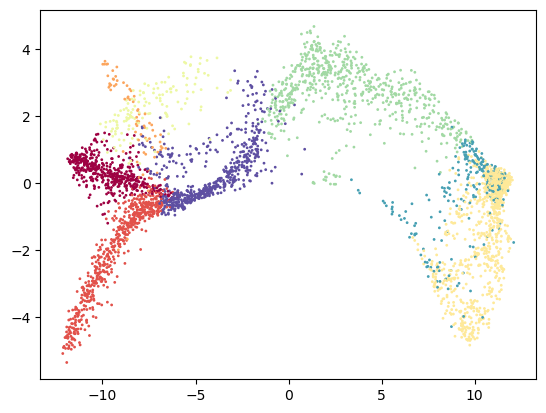

In [5]:
dtne_operator = DTNE() 
Y = dtne_operator.fit_transform(X_pca)
plt.scatter(Y[:,0], Y[:,1], c=cell_clusters,s=1,cmap='Spectral')

Adjust default parameters.

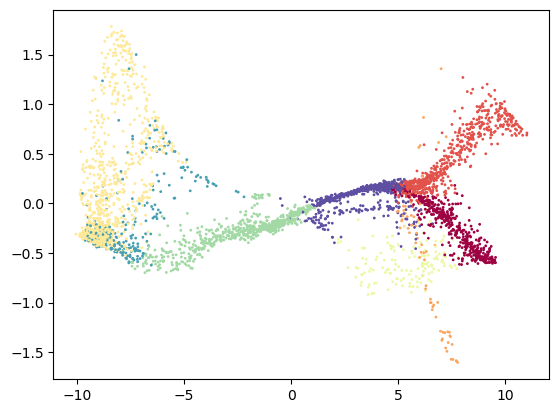

In [6]:
dtne_operator = DTNE(k_neighbors = 15,l1=10) 
Y = dtne_operator.fit_transform(X_pca)
plt.scatter(Y[:,0], Y[:,1], c=cell_clusters,s=1,cmap='Spectral')

Calculate pseudotime ordering and identify cell clustering. 

In [7]:
dtne_pseudotime = dtne_operator.order_cells(root_cells=[2208])
dtne_cluster = dtne_operator.cluster_cells(n_clusters=8)

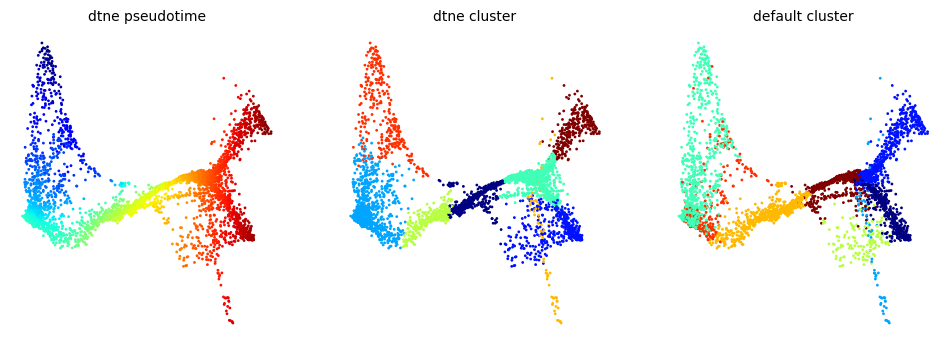

In [8]:
fig,axes = plt.subplots(ncols=3,figsize=(12, 4))
for ax in axes.ravel():
    ax.set_axis_off()
  
title_names = ['dtne pseudotime','dtne cluster','default cluster']
cell_colors = [dtne_pseudotime,dtne_cluster,cell_clusters]  

for i,ax in enumerate(axes):
    ax.set_title(title_names[i], fontsize=10)
    ax.scatter(Y[:,0], Y[:,1],c=cell_colors[i],s=1,cmap='jet')

**Comparison with UMAP visualization**

In [9]:
import umap
umap.__version__

'0.5.5'

In [10]:
umap_operator = umap.UMAP(random_state=123) 
Y_umap = umap_operator.fit_transform(X_pca)

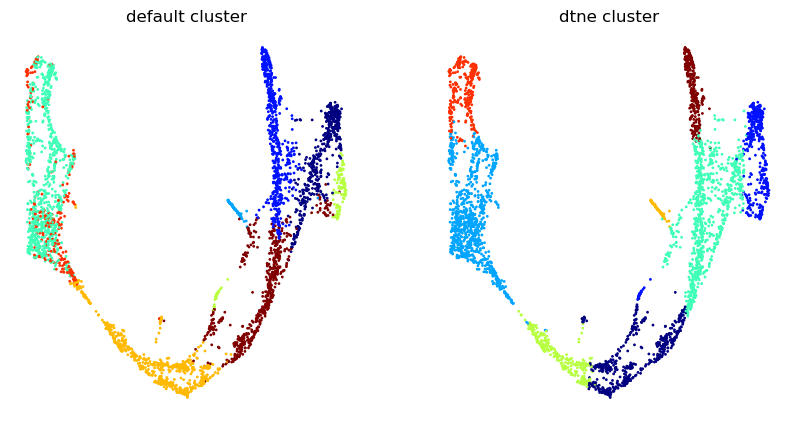

In [11]:
fig,axes = plt.subplots(ncols=2,figsize=(10, 5))
for ax in axes.ravel():
    ax.set_axis_off()
  
title_names = ['default cluster','dtne cluster']
cell_colors = [cell_clusters, dtne_cluster]  

for i,ax in enumerate(axes):
    ax.set_title(title_names[i], fontsize=12)
    ax.scatter(Y_umap[:,0], Y_umap[:,1],c=cell_colors[i],s=1,cmap='jet')        

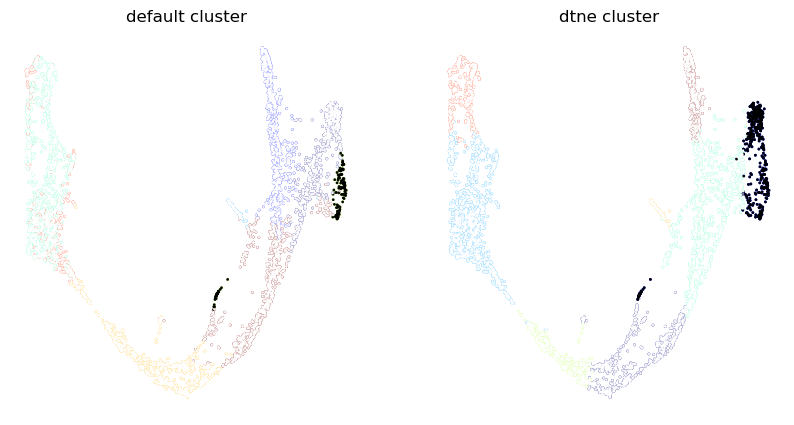

In [12]:
ic_ids1 = [1 if cell_clusters[i] == 4 else 0 for i in range(len(cell_clusters))]
ic_ids2 = [1 if dtne_cluster[i] == 1 else 0 for i in range(len(dtne_cluster))]

fig,axes = plt.subplots(ncols=2,figsize=(10, 5))
for ax in axes.ravel():
    ax.set_axis_off()
  
title_names = ['default cluster','dtne cluster']
cell_colors = [cell_clusters, dtne_cluster]  
ic_ids = [ic_ids1,ic_ids2]

for i,ax in enumerate(axes):
    ax.set_title(title_names[i], fontsize=12)
    ax.scatter(Y_umap[:,0], Y_umap[:,1],c=cell_colors[i],s=1,cmap='jet') 
    ax.scatter(Y_umap[:,0], Y_umap[:,1],c=ic_ids[i],s=1,alpha=0.9,cmap='Grays')

The inconsistency between the UMAP representation and clustering results suggests that UMAP distorts the original geometric relationships between cells in this 2D representation.